In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
calls = pd.read_excel('new_Calls.xlsx')

In [ ]:
deals = pd.read_excel('new_Deals.xlsx')

**Analyze the trend of deal creation over time and its relationship to calls.**

Data on deals and calls have columns Created Time for deals and Call Start Time for calls, which can be used to analyze time series.

To analyze the trend of created deals over time, group the data by month and count the number of created deals for each period.

Analyze calls over time - similar to analyzing deals, you can see how often calls were made and see the dynamics of call activity.

See if there is a correlation between the number of calls and the number of created deals in a certain period.


In [ ]:
# Group Created Time by month to calculate the number of deals
deals_by_month = deals.groupby(deals['Created Time'].dt.to_period('M')).size()
deals_by_month

,0
Created Time,
2023-07,653
2023-08,1085
2023-09,1079
2023-10,1598
2023-11,1947
2023-12,1810
2024-01,2243
2024-02,2184
2024-03,2252


In [ ]:
# Group Call Start Time by month to calculate the number of calls
calls_by_month = calls.groupby(calls['Call Start Time'].dt.to_period('M')).size()
calls_by_month

,0
Call Start Time,
2023-06,7
2023-07,1935
2023-08,4251
2023-09,5156
2023-10,7102
2023-11,7170
2023-12,7099
2024-01,9804
2024-02,9599


let's see the number of calls that took place (greater than 0)

In [ ]:
# Group Call Start Time by month to calculate the number of calls
calls_by_month_done = calls[calls['Call Duration (in seconds)'] > 0].groupby(calls['Call Start Time'].dt.to_period('M')).size()
calls_by_month_done

,0
Call Start Time,
2023-06,7
2023-07,1414
2023-08,2996
2023-09,3717
2023-10,5399
2023-11,5690
2023-12,5836
2024-01,8120
2024-02,7846


Due to the fact that the range on calls starts a month earlier, we create a timestamp

In [ ]:
deals_by_month.index = deals_by_month.index.to_timestamp()
calls_by_month.index = calls_by_month.index.to_timestamp()
calls_by_month_done.index = calls_by_month_done.index.to_timestamp()

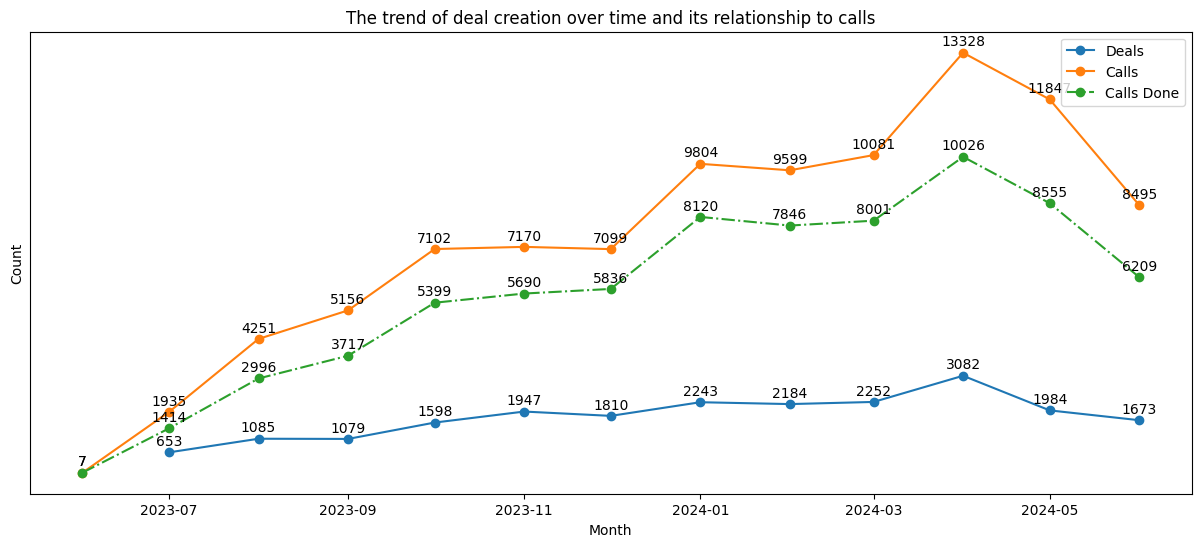

In [ ]:
plt.figure(figsize=(15, 6))

# Deals
plt.plot(deals_by_month.index, deals_by_month, label='Deals', marker='o', linestyle='-')
for i, value in enumerate(deals_by_month):
    plt.annotate(f'{value}', (deals_by_month.index[i], value), textcoords="offset points", xytext=(0,5), ha='center')

# Calls
plt.plot(calls_by_month.index, calls_by_month, label='Calls', marker='o', linestyle='-')
for i, value in enumerate(calls_by_month):
    plt.annotate(f'{value}', (calls_by_month.index[i], value), textcoords="offset points", xytext=(0,5), ha='center')

# Calls_done
plt.plot(calls_by_month_done.index, calls_by_month_done, label='Calls Done', marker='o', linestyle='-.')
for i, value in enumerate(calls_by_month_done):
    plt.annotate(f'{value}', (calls_by_month_done.index[i], value), textcoords="offset points", xytext=(0,5), ha='center')


plt.title('The trend of deal creation over time and its relationship to calls')
plt.xlabel('Month')
plt.ylabel('Count')
plt.yticks([])
plt.legend()
plt.show()


**Calls:** The graph shows a sharp increase in the number of calls from July 2023 (7) to March 2024 (13328). There is then a decline in April and May 2024 to 8,495 calls. deals: The number of deals also increases, but at a much slower rate than calls. Transactions peak in March 2024 (3,082) and then there is a decline until May (1,673). Thus, we can conclude that call activity is related to deals, and a decrease in calls leads to a decrease in deals.

It should be noted that in the beginning, far fewer calls were required to close a deal (coefficient is higher), and later on, despite the increase in calls, their conversion rate drops (coefficient decreases). **See below:**

In [ ]:
deals_by_month = deals_by_month.reset_index()
calls_by_month = calls_by_month.reset_index()

In [ ]:
# Combine data into one table by month
merged_data = pd.merge(deals_by_month,
                       calls_by_month,
                       left_on='Created Time',
                       right_on='Call Start Time',
                       how='left')
merged_data

,Created Time,0_x,Call Start Time,0_y
0,2023-07-01,653,2023-07-01,1935
1,2023-08-01,1085,2023-08-01,4251
2,2023-09-01,1079,2023-09-01,5156
3,2023-10-01,1598,2023-10-01,7102
4,2023-11-01,1947,2023-11-01,7170
5,2023-12-01,1810,2023-12-01,7099
6,2024-01-01,2243,2024-01-01,9804
7,2024-02-01,2184,2024-02-01,9599
8,2024-03-01,2252,2024-03-01,10081
9,2024-04-01,3082,2024-04-01,13328


In [ ]:
# Calculate conversion rate (transactions / calls)
merged_data['Conversion Rate (%)'] = (merged_data['0_x'] / merged_data['0_y']) * 100
merged_data

,Created Time,0_x,Call Start Time,0_y,Conversion Rate (%)
0,2023-07-01,653,2023-07-01,1935,33.746770
1,2023-08-01,1085,2023-08-01,4251,25.523406
2,2023-09-01,1079,2023-09-01,5156,20.927075
3,2023-10-01,1598,2023-10-01,7102,22.500704
4,2023-11-01,1947,2023-11-01,7170,27.154812
5,2023-12-01,1810,2023-12-01,7099,25.496549
6,2024-01-01,2243,2024-01-01,9804,22.878417
7,2024-02-01,2184,2024-02-01,9599,22.752370
8,2024-03-01,2252,2024-03-01,10081,22.339054
9,2024-04-01,3082,2024-04-01,13328,23.124250


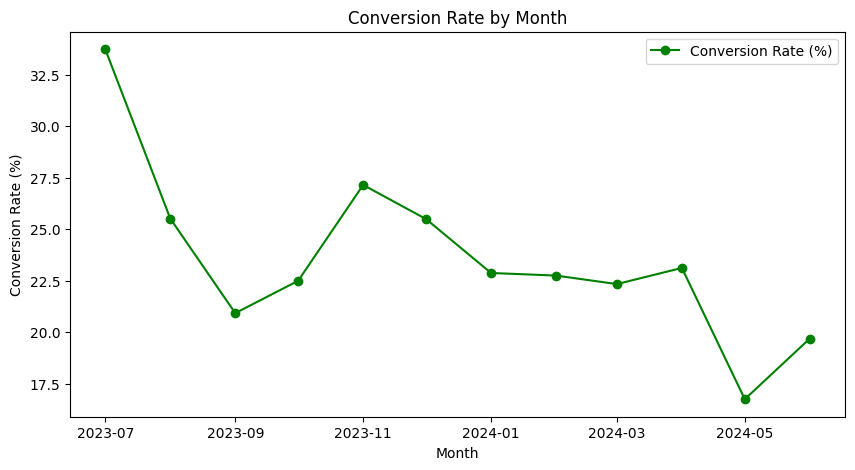

In [ ]:
fig = plt.figure(figsize=(10, 5))

plt.plot(merged_data['Call Start Time'], merged_data['Conversion Rate (%)'], label='Conversion Rate (%)', marker='o', color='green')
plt.title('Conversion Rate by Month')
plt.xlabel('Month')
plt.ylabel('Conversion Rate (%)')
plt.legend()

plt.show()


Conversion peaks and dips may be due to seasonal factors, changes in marketing campaigns or changes in customer behavior.
From July 2023 to May 2024, the overall trend is downward with small recovery phases, which may indicate a deterioration in customer engagement or external factors affecting the business.

Each sharp decline is followed by a small recovery in the following month, which may indicate short-term solutions to improve performance.

The overall picture shows a tendency for conversion rates to decline over the long term, which may signal problems in marketing strategy or customer experience performance.

**Examine the distribution of closing times of trades and the length of time from creation to closing.**



See how long it takes on average to close a deal after creation to evaluate the efficiency of the sales process
For each deal, calculate the difference between the closing and creation dates (days)

In [ ]:
# filter data on deals that are closed
closed_deals = deals[deals['Closing Date'].notna()].copy()
closed_deals.head(3)

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
2,5805028000056832000,Ulysses Adams,2024-06-21,D - Non Target,Lost,Non target,/at-eng,engwien_AT,0.018553,b1-at,...,Unknown,Unknown,2024-06-21 14:45:00,NaN,NaN,NaN,NaN,5805028000056854528,Unknown,Unknown
3,5805028000056823808,Eva Kent,2024-06-21,E - Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_DE,0.041713,bloggersvideo14com,...,Unknown,Unknown,2024-06-21 13:32:00,NaN,NaN,NaN,NaN,5805028000056888320,Unknown,Unknown
4,5805028000056872960,Ben Hall,2024-06-21,D - Non Target,Lost,Non target,/eng,discovery_DE,0.036944,website,...,Unknown,Unknown,2024-06-21 13:21:00,NaN,NaN,NaN,NaN,5805028000056876032,Unknown,Unknown


In [ ]:
# Because Closing Date is a date type and Created Time is a date-time type, it must be converted to the same format
closed_deals['Created Time'] = closed_deals['Created Time'].dt.normalize()

closed_deals['Duration (days)'] = (closed_deals['Closing Date'] - closed_deals['Created Time']).dt.days

closed_deals[(closed_deals['Duration (days)'] == -1)][['Closing Date', 'Created Time', 'Duration (days)']]

,Closing Date,Created Time,Duration (days)
3018,2024-05-07,2024-05-08,-1
3030,2024-05-07,2024-05-08,-1
9348,2024-02-24,2024-02-25,-1


In [ ]:
# Because Closing Date is a date type and Created Time is a date-time type, it must be converted to the same format
closed_deals['Created Time'] = closed_deals['Created Time'].dt.normalize()

closed_deals['Duration (days)'] = 1+(closed_deals['Closing Date'] - closed_deals['Created Time']).dt.days
closed_deals.head(3)

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Duration (days)
2,5805028000056832000,Ulysses Adams,2024-06-21,D - Non Target,Lost,Non target,/at-eng,engwien_AT,0.018553,b1-at,...,Unknown,2024-06-21,NaN,NaN,NaN,NaN,5805028000056854528,Unknown,Unknown,1
3,5805028000056823808,Eva Kent,2024-06-21,E - Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_DE,0.041713,bloggersvideo14com,...,Unknown,2024-06-21,NaN,NaN,NaN,NaN,5805028000056888320,Unknown,Unknown,1
4,5805028000056872960,Ben Hall,2024-06-21,D - Non Target,Lost,Non target,/eng,discovery_DE,0.036944,website,...,Unknown,2024-06-21,NaN,NaN,NaN,NaN,5805028000056876032,Unknown,Unknown,1


In [ ]:
# I assume that minus values are a data error and do not take them into account
positive_durations = closed_deals[closed_deals['Duration (days)'] > 0]['Duration (days)']

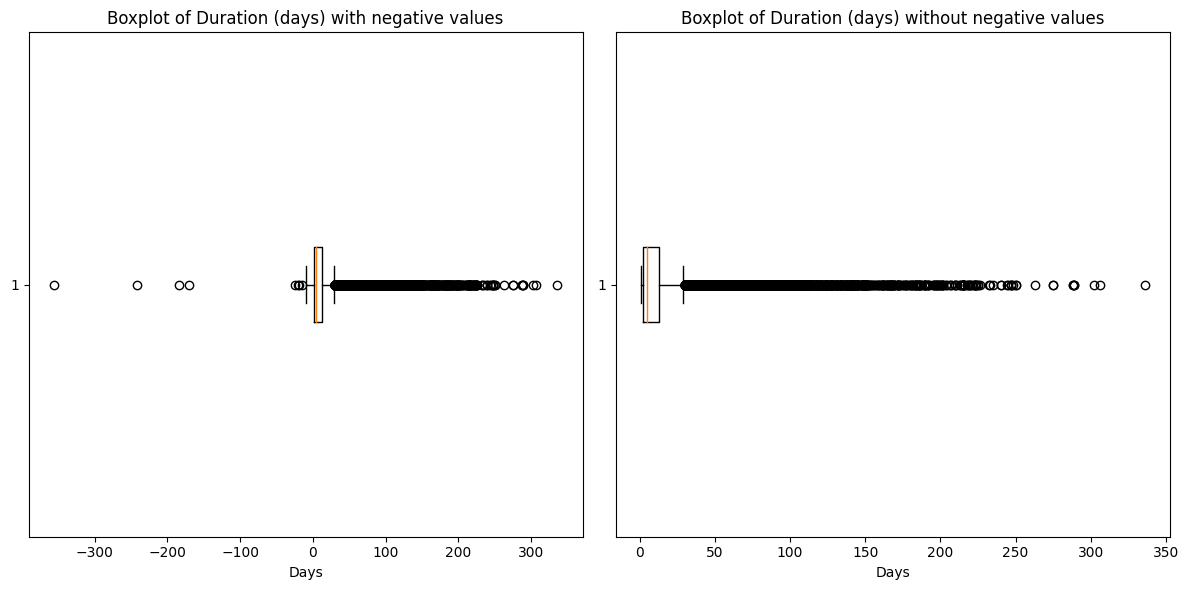

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# with negative values
axs[0].boxplot(closed_deals['Duration (days)'], vert=False)
axs[0].set_title('Boxplot of Duration (days) with negative values')
axs[0].set_xlabel('Days')

# without negative values
axs[1].boxplot(positive_durations, vert=False)
axs[1].set_title('Boxplot of Duration (days) without negative values')
axs[1].set_xlabel('Days')

fig.tight_layout()
plt.show()

statistics on calculated duration (no minus values)

In [ ]:
durations_stats = positive_durations.describe()
print("Statistics of the period of closing deals:")
print(durations_stats)

Statistics of the period of closing deals:
count    14599.000000
mean        16.013768
std         31.523403
min          1.000000
25%          2.000000
50%          5.000000
75%         13.000000
max        336.000000
Name: Duration (days), dtype: float64


In [ ]:
median_duration = positive_durations.median()
mode_duration = positive_durations.mode()[0]

print(f"MEDIAN duration: {median_duration}")
print(f"MODE duration: {mode_duration}")

MEDIAN duration: 5.0
MODE duration: 1


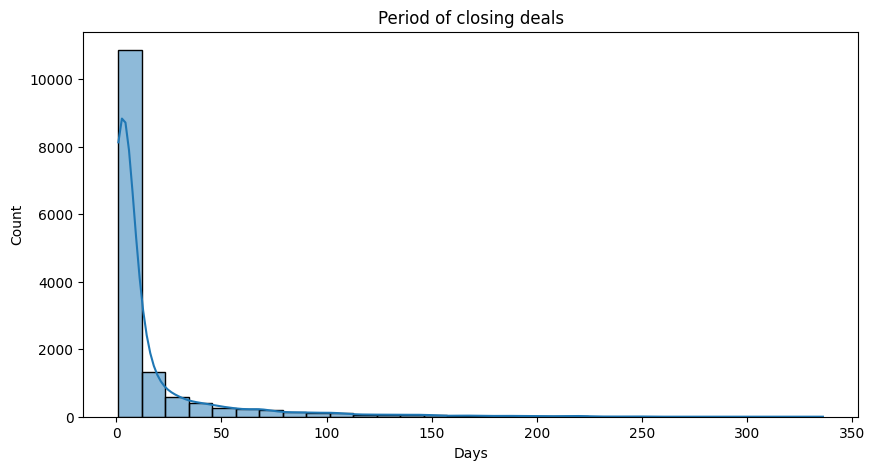

In [ ]:
plt.figure(figsize=(10, 5))

sns.histplot(positive_durations, kde=True, bins=30)
plt.title('Period of closing deals')
plt.xlabel('Days')
plt.ylabel('Count')

plt.show()

Most deals are closed in the shortest terms - less than 10 days. The graph has a pronounced shift to the left, as the X-axis shows that a small number of deals are closed over a longer period of time (up to 350 days)

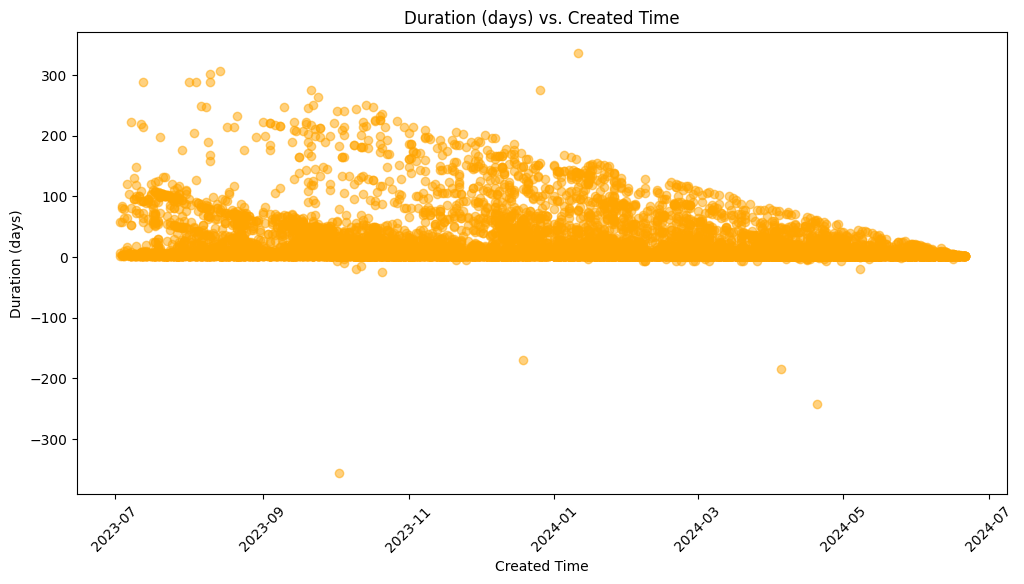

In [ ]:
# distribution of time of closing of deals by time of creation

plt.figure(figsize=(12, 6))
plt.scatter(closed_deals['Created Time'], closed_deals['Duration (days)'], alpha=0.5, color='orange')
plt.title('Duration (days) vs. Created Time')
plt.xlabel('Created Time')
plt.ylabel('Duration (days)')
plt.xticks(rotation=45)
plt.show()

The graph shows a **general trend of decreasing closing times over time** - the closer we get to 2024, the shorter the average closing time, indicating improved deal processing efficiency and a stable deal closing process.

Anomalies and outliers: Several points below 0 are visible in the data, which can be interpreted as data error or process specificity. A decrease in outliers indicates an improvement in the process.

**Conclusions:** Performance optimization can continue if the trend of decreasing deal closing time continues.